In [ ]:
# !pip install ace

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 다시 파일 로드 및 전처리 진행



# 데이터 불러오기
df = pd.read_csv("./data/Bank Customer Churn Prediction.csv")

# 2) products_number를 범주형 변수로 변환
df["products_category"] = df["products_number"].map({1: "low", 2: "medium", 3: "high", 4: "high"})

# 3) age를 연령대 그룹화
df["age_group"] = pd.cut(df["age"], bins=[18, 30, 50, 100], labels=["young", "middle_age", "senior"])

# 4) credit_score를 신용 등급으로 변환
df["credit_score_group"] = pd.cut(
    df["credit_score"], bins=[0, 580, 730, 850], labels=["low", "medium", "high"]
)
df.to_csv("./data/Transformed_Bank_Customer_Churn.csv", index=False)



In [4]:
df = pd.read_csv("./data/Transformed_Bank_Customer_Churn.csv")

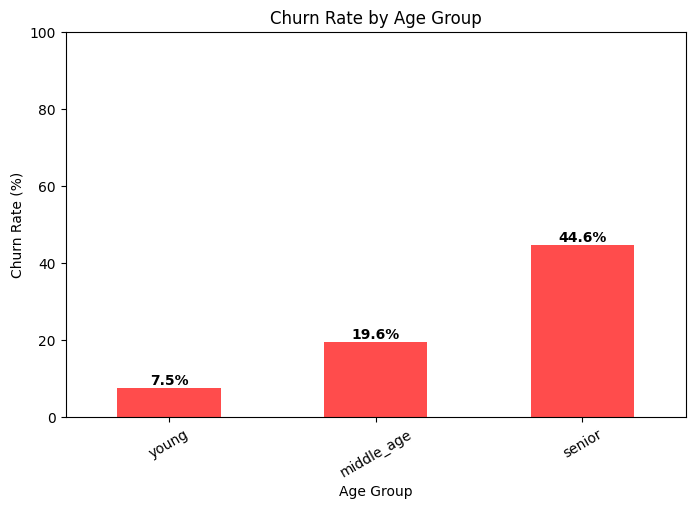

In [5]:

# 연령대 순서를 지정
age_order = ['young', 'middle_age', 'senior']

# 연령대별 이탈률(%) 계산
churn_data_age = df.groupby('age_group')['churn'].mean() * 100

# 지정된 순서대로 정렬
churn_data_age = churn_data_age.reindex(age_order)

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_age.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


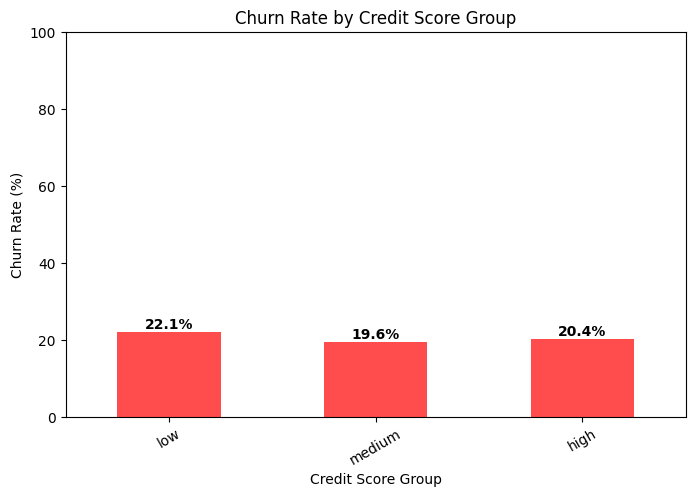

In [6]:
credit_order = ['low','medium','high']

# 신용 점수 그룹별 이탈률(%) 계산
churn_data_credit = df.groupby('credit_score_group')['churn'].mean() * 100
churn_data_credit = churn_data_credit.reindex(credit_order)
# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_credit.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Credit Score Group")
plt.xlabel("Credit Score Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

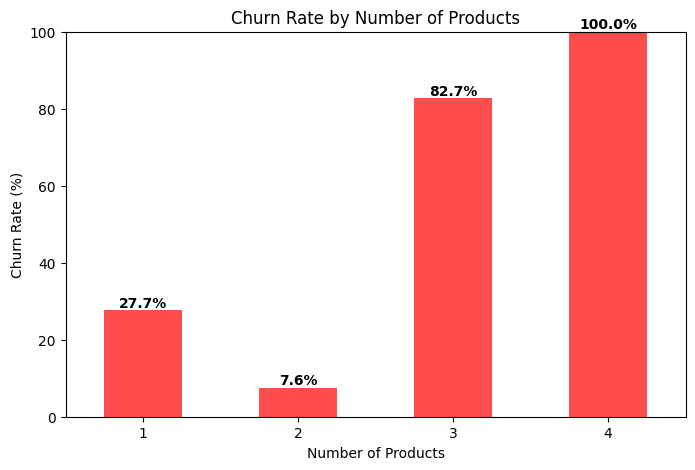

In [7]:

# 상품 개수별 이탈률(%) 계산
churn_data_product = df.groupby('products_number')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_product.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


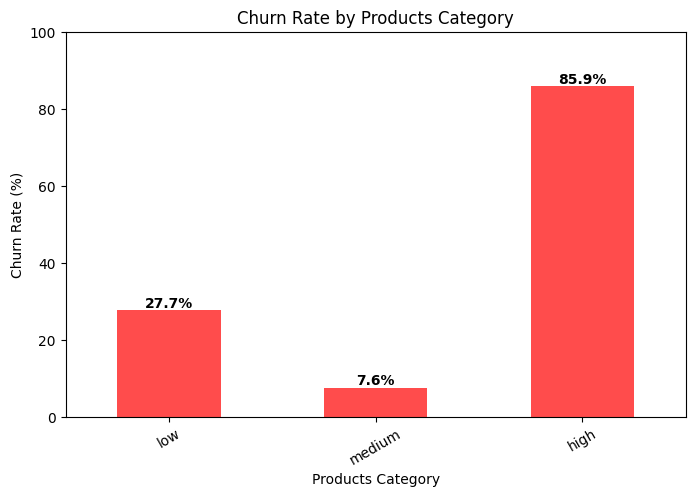

In [8]:

product_order = ['low','medium','high']

# 상품 카테고리별 이탈률(%) 계산
churn_data_category = df.groupby('products_category')['churn'].mean() * 100
churn_data_category = churn_data_category.reindex(product_order)
# 그래프 시각화
plt.figure(figsize=(8, 5))
ax =churn_data_category.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Products Category")
plt.xlabel("Products Category")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)


for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


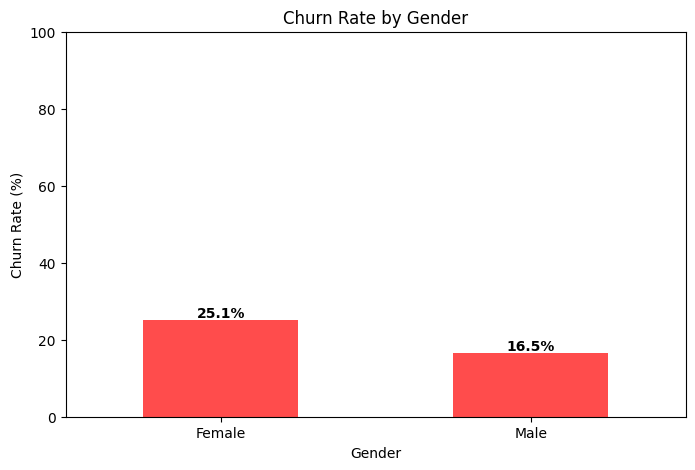

In [9]:
# 성별 이탈률(%) 계산
churn_data_gender = df.groupby('gender')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_gender.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


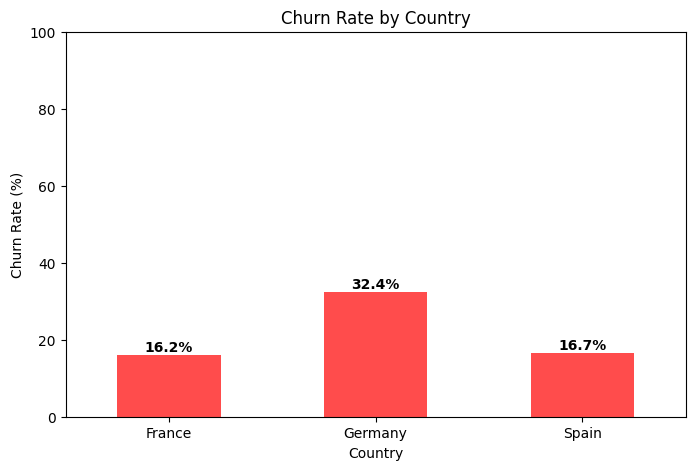

In [10]:
# 국가별 이탈률(%) 계산
churn_data_country = df.groupby('country')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax=churn_data_country.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Country")
plt.xlabel("Country")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_7572\3339524408.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_data_salary = df.groupby('salary_group')['churn'].mean() * 100


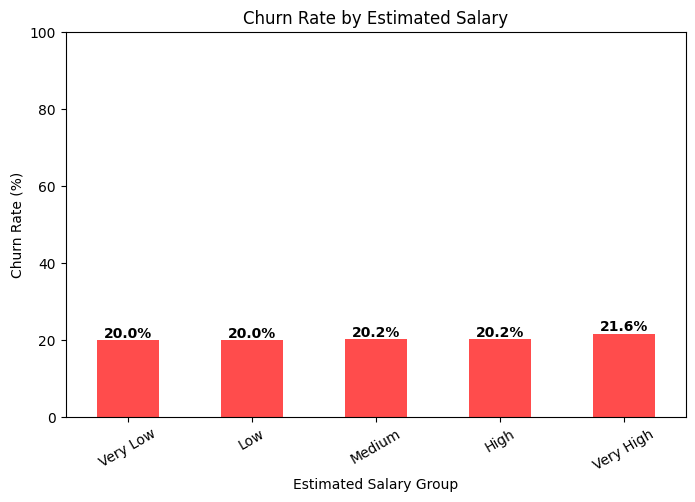

In [11]:
# 'estimated_salary'를 구간별로 나누기 (예: 5개 구간)
df['salary_group'] = pd.qcut(df['estimated_salary'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 급여 그룹별 이탈률(%) 계산
churn_data_salary = df.groupby('salary_group')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax = churn_data_salary.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Estimated Salary")
plt.xlabel("Estimated Salary Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30)
plt.ylim(0, 100)

# 막대 위에 비율 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_7572\1698983464.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_data_tenure_group = df.groupby('tenure_group')['churn'].mean() * 100


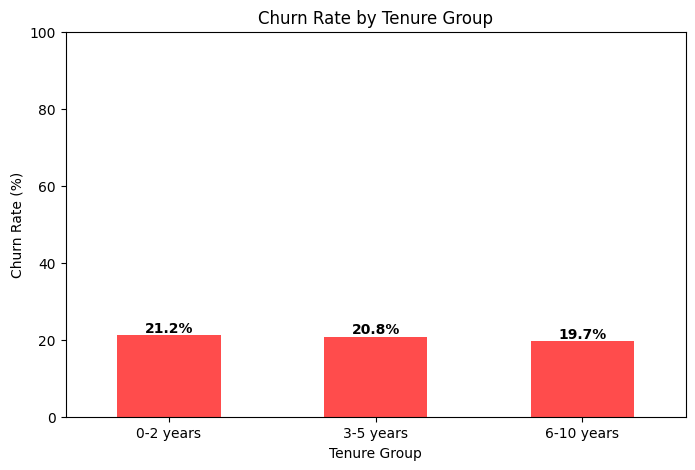

In [12]:
# 근속 연수(tenure) 구간화
bins = [0, 2, 5, 10]  # 구간 설정 (0-2년, 3-5년, 6-10년)
labels = ['0-2 years', '3-5 years', '6-10 years']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# 근속 연수 그룹별 이탈률(%) 계산
churn_data_tenure_group = df.groupby('tenure_group')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax = churn_data_tenure_group.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# 막대 위에 비율 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


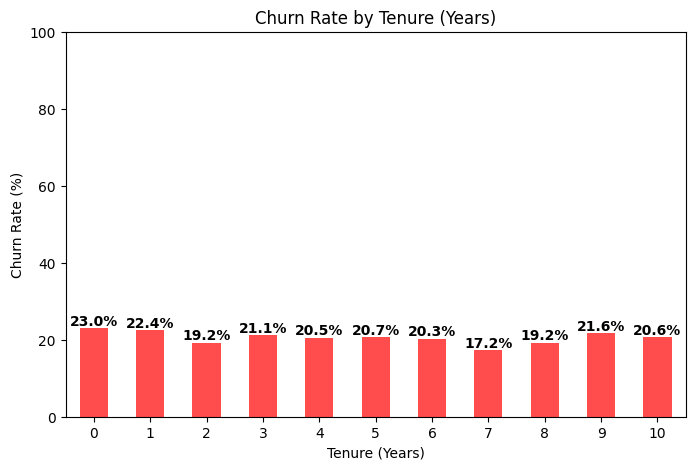

In [13]:
# 근속 연수(tenure)별 이탈률(%) 계산
churn_data_tenure = df.groupby('tenure')['churn'].mean() * 100

# 그래프 시각화
plt.figure(figsize=(8, 5))
ax = churn_data_tenure.plot(kind='bar', color='red', alpha=0.7)
plt.title("Churn Rate by Tenure (Years)")
plt.xlabel("Tenure (Years)")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# 막대 위에 비율 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


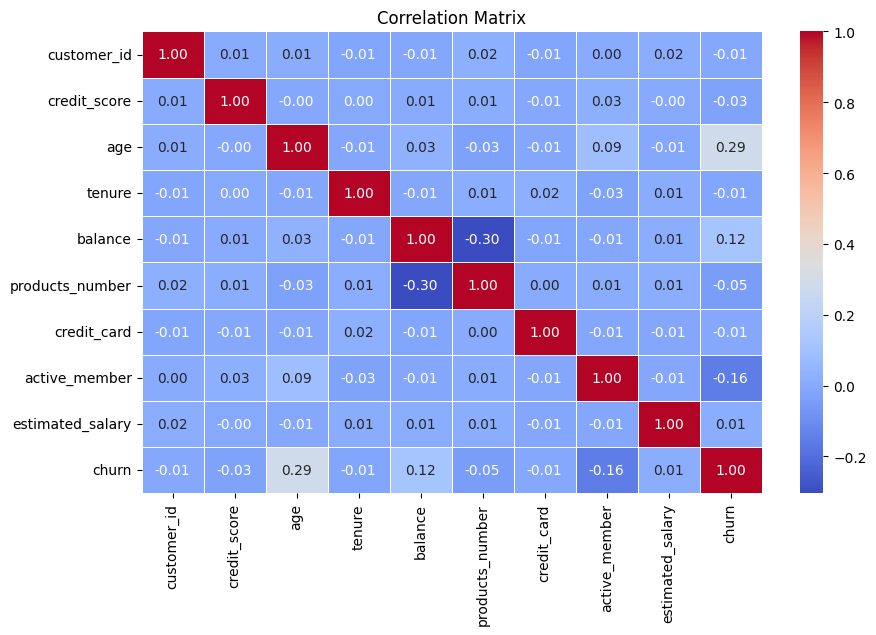

In [14]:
import seaborn as sns
import numpy as np

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_7572\2067283142.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Reds_r")


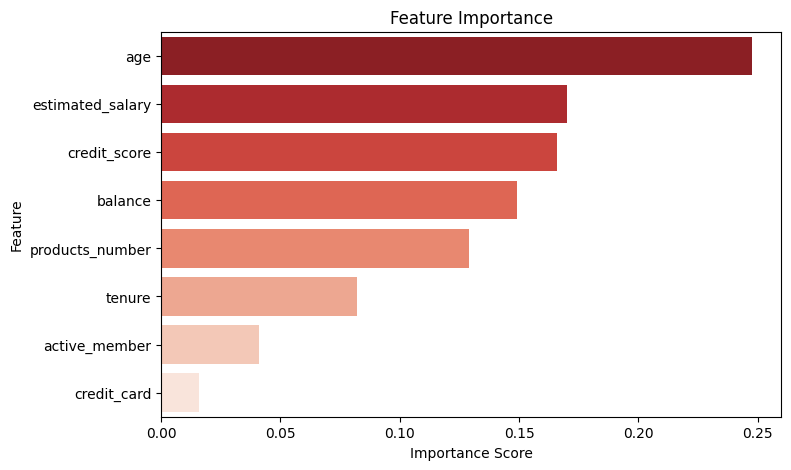

In [15]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 
            'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 특성 중요도 추출
feature_importances = model.feature_importances_

# 데이터프레임으로 변환 후 정렬
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Reds_r")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
